In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [2]:
# previous 10 years stock market price

start='2012-01-01'
end='2024-12-21'

stock='GOOG'

data= yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2012-01-05,16.354963,16.478058,16.285971,16.432394,131808205
2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...
2024-12-16,198.160004,200.639999,194.110001,194.365005,32248600
2024-12-17,197.119995,202.880005,196.690002,198.529999,24129500


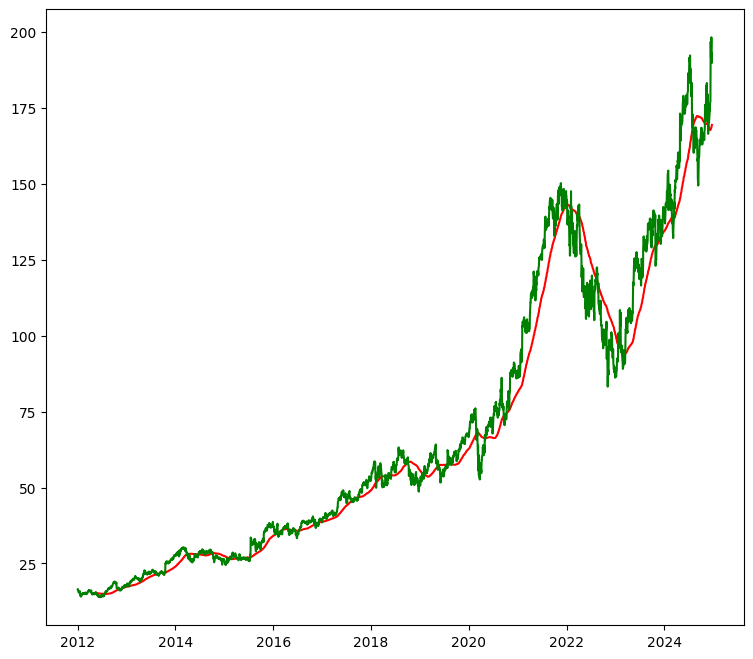

In [4]:
#average for 100 days
ma_100_days= data.Close.rolling(100).mean()
plt.figure(figsize=(9,8))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

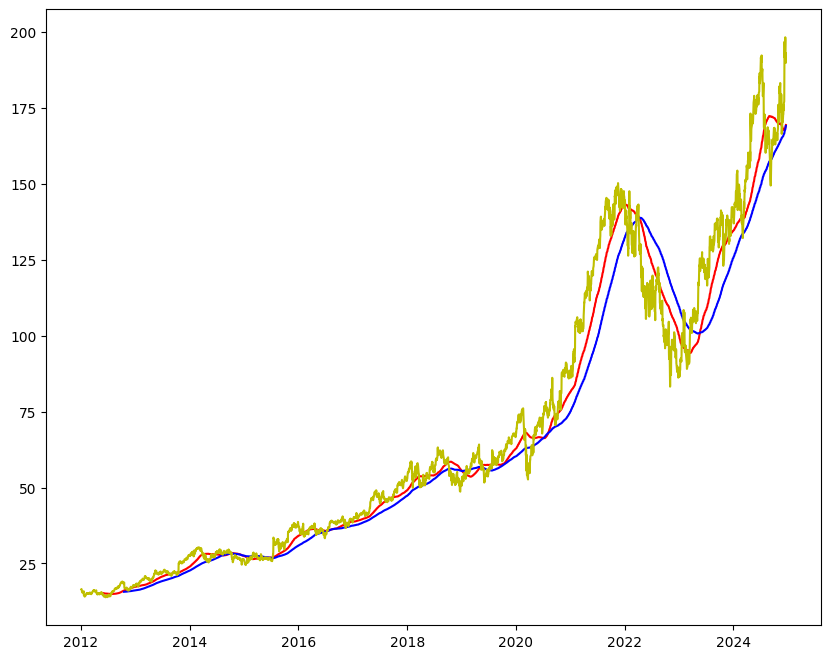

In [5]:
#average for 200 days
ma_200_days=data.Close.rolling(200).mean()
plt.figure(figsize=(10,8))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'y')
plt.show()


In [6]:
#removing NULL or missing values
data.dropna(inplace=True)


In [7]:
#splitting data into training and testing(80%,20%)
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):])


In [8]:
#no of rows in train_set
data_train.shape[0]

2611

In [9]:
#no of rows in test_set
data_test.shape[0]

653

In [10]:
#MinMaxScaler used to fit data between range 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [11]:
data_train_scale=scaler.fit_transform(data_train)

'''example

10 11 12 15 16 17 18 19 17 18 (10 days stock price)

predict 11th day stock price'''
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [12]:
x,y=np.array(x),np.array(y)

In [13]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

# Initialize the model
model = Sequential()

# First LSTM layer with dropout
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer with dropout
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer with dropout
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

# Fourth LSTM layer with dropout
model.add(LSTM(units=130, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1))

# Compile the model (if you'd like to include this step here)
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 130)                 │         109,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 130)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             131 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 192,011 (750.04 KB)

 Trainable params: 192,011 (750.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
model.fit(x,y,epochs = 50, batch_size=32,verbose =1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 36s 342ms/step - loss: 0.0498
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 28s 352ms/step - loss: 0.0049
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 361ms/step - loss: 0.0038
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 329ms/step - loss: 0.0039
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 325ms/step - loss: 0.0035
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 342ms/step - loss: 0.0041
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 362ms/step - loss: 0.0032
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 349ms/step - loss: 0.0035
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 353ms/step - loss: 0.0027
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 46s 410ms/step - loss: 0.0033
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 29s 372ms/step - loss: 0.0024
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 362ms/step - loss: 0.0032
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 39s 334ms/step - loss: 0.0020
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 42s 350ms/step - loss: 0.0025
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 41s 

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 130)                 │         109,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 130)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             131 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 576,035 (2.20 MB)

 Trainable params: 192,011 (750.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 384,024 (1.46 MB)

In [17]:
pas_100_days=data_train.tail(100)

In [18]:
data_test = pd.concat([pas_100_days,data_test],ignore_index=True)
data_test


Ticker,GOOG
0,146.615692
1,147.533890
2,145.923676
3,145.979980
4,145.479782
...,...
748,198.160004
749,197.119995
750,190.149994
751,189.699997


In [19]:
data_test_scale = scaler.fit_transform(data_test)

In [20]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)

In [21]:
y_predict=model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step


In [22]:
#printing the predicted value
y_predict

array([[0.3019995 ],
       [0.29915556],
       [0.29651037],
       [0.29369718],
       [0.29063487],
       [0.2871866 ],
       [0.2833238 ],
       [0.27921113],
       [0.27522862],
       [0.27161208],
       [0.2685381 ],
       [0.26622313],
       [0.26470587],
       [0.26408988],
       [0.26446125],
       [0.26582754],
       [0.26801875],
       [0.27061468],
       [0.27295047],
       [0.27440146],
       [0.2747867 ],
       [0.2741321 ],
       [0.27261147],
       [0.27059397],
       [0.2683907 ],
       [0.26622468],
       [0.26448303],
       [0.2633634 ],
       [0.2628556 ],
       [0.2628519 ],
       [0.26306012],
       [0.2632244 ],
       [0.26330683],
       [0.26341206],
       [0.2638729 ],
       [0.26510426],
       [0.26720068],
       [0.27003574],
       [0.27308103],
       [0.27585626],
       [0.27808812],
       [0.2794694 ],
       [0.28005734],
       [0.280064  ],
       [0.27976727],
       [0.2790642 ],
       [0.27785766],
       [0.276

In [23]:
scaler.scale_

array([0.008698])

In [24]:
scale=1/scaler.scale_

In [25]:
y_predict=y_predict*scale

In [26]:
y=y*scale

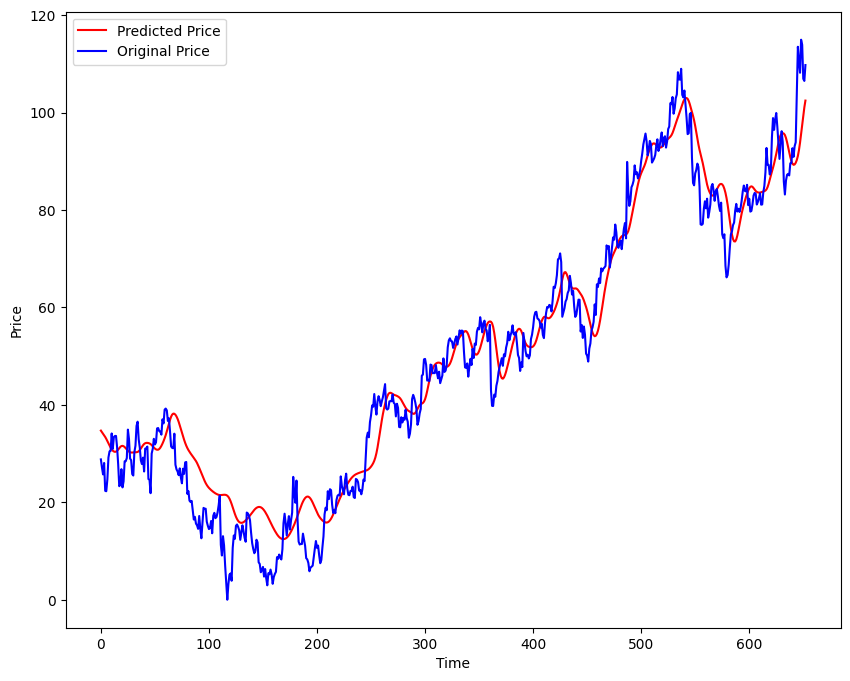

In [27]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'b',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [28]:
model.save('Stock Predictions Model.keras')


In [4]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [5]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
added 22 packages in 4s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋npm notice
npm notice New major version of npm available! 10.8.2 -> 11.0.0
npm notice Changelog: https://github.com/npm/cli/releases/tag/v11.0.0
npm notice To update run: npm install -g npm@11.0.0
npm notice
⠋

In [31]:
!pip install keras

In [32]:
!pip install tensorflow

In [6]:
!pip install streamlit

In [7]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧
up to date, audited 23 packages in 1s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧
2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠧

In [11]:
!streamlit run /content/app.py &> /content/logs.txt &

In [14]:
!npx localtunnel --port 8501

⠙your url is: https://twelve-kids-attend.loca.lt
⠙